# Klasifikasi Gambar Sensor EWS Trafo Menggunakan Metode CNN

## Alfendio Alif Faudisyah - FTI UKSW

# Import Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Membangun dan Mengenali Dataset

## Membangun Dataset

In [3]:
import pathlib
data_dir = pathlib.Path('D:/Dataset Sensor EWS Trafo')

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

325


In [9]:
#MQ4 = list(data_dir.glob('MQ 4/*.jpg'))
#PIL.Image.open(str(MQ4[0])).show()

## Standarisasi Dataset

In [10]:
img_height = 180
img_width = 180
batch_size = 32

## Membagi Dataset

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123, # random image
    image_size = (img_height, img_width),
    batch_size = batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
    )

Found 325 files belonging to 5 classes.
Using 260 files for training.
Found 325 files belonging to 5 classes.
Using 65 files for validation.


## Cari nama kelas

In [14]:
class_names = train_ds.class_names
print(class_names)

['CT PZEM 044t', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']


# Visualisasi Dataset

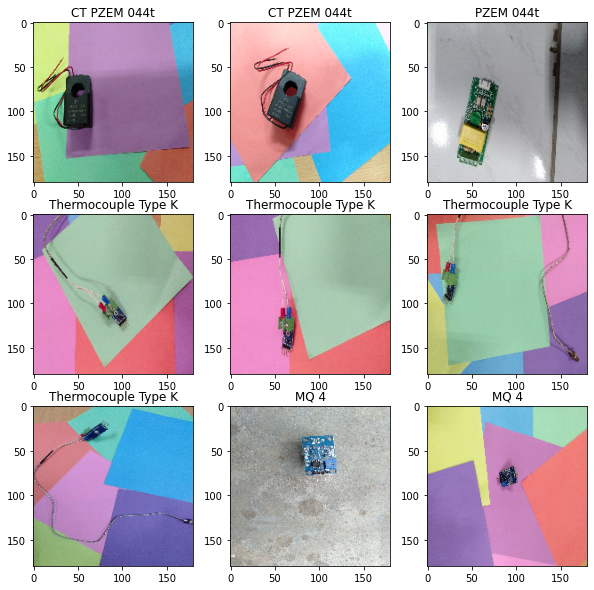

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert bentuk image vektor RGB ke uint8
        plt.title(class_names[labels[i]])

# Tuning

In [16]:
# Tune Dataset 
# Membuat data ada di memori
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Membangun Model Klasifikasi

In [33]:
# Create Model CNN
# Class target < - 5 kelas
num_classes = 5

model = Sequential([
    data_augmentation,
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling menjadi greyscale
    layers.Conv2D(16, 3, padding='same', activation='relu'), # membuat convolutional layer 2D
    layers.MaxPooling2D(), # membuat max pooling layer 2D -> menyimpan feature yang akan kita simpan, menyimpan pooling dari conv 2D
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # dropout layer -> menghilangkan neuron yang tidak terlalu penting, mengurangi overfitting
    layers.Flatten(), # flatten layer -> mengubah bentuk 2D menjadi array 1D
    layers.Dense(128, activation='relu'), # mencari hubungan dari maxpoling 2D yang didapatkan, flatten
    layers.Dense(num_classes) # output layer
])

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [35]:
# Compile Model CNN
# Compile model untuk melakukan training
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train Model

In [36]:
# Train Model 
epochs = 10
history = model.fit( # simpan dalam history
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
9/9 [==============================] - 4s 207ms/step - loss: 98.4539 - accuracy: 0.1885 - val_loss: 4.9555 - val_accuracy: 0.2154
Epoch 2/10
9/9 [==============================] - 2s 192ms/step - loss: 2.1927 - accuracy: 0.2500 - val_loss: 1.4171 - val_accuracy: 0.4308
Epoch 3/10
9/9 [==============================] - 2s 260ms/step - loss: 1.3080 - accuracy: 0.4038 - val_loss: 3.1167 - val_accuracy: 0.3385
Epoch 4/10
9/9 [==============================] - 2s 259ms/step - loss: 1.2547 - accuracy: 0.4769 - val_loss: 1.9925 - val_accuracy: 0.4308
Epoch 5/10
9/9 [==============================] - 2s 259ms/step - loss: 1.1729 - accuracy: 0.4692 - val_loss: 2.3392 - val_accuracy: 0.3846
Epoch 6/10
9/9 [==============================] - 2s 258ms/step - loss: 0.9655 - accuracy: 0.6077 - val_loss: 2.4255 - val_accuracy: 0.4923
Epoch 7/10
9/9 [==============================] - 2s 256ms/step - loss: 0.8397 - accuracy: 0.6462 - val_loss: 3.2287 - val_accuracy: 0.4462
Epoch 8/10
9/9 [===

# Visualisasi Training

Text(0.5, 1.0, 'Training and Validation Loss')

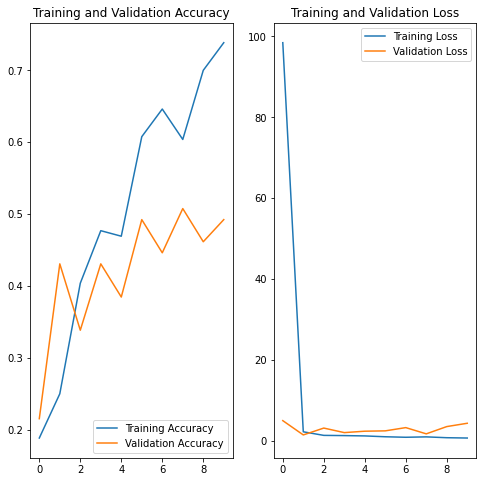

In [83]:
# Visualisasi Training Akurasi 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Visualisasi Training Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs 
epochs_range = range(epochs)
plt.figure(figsize=(8, 8)) # tampilan dalam figure

plt.subplot(1, 2, 1) # tampilan sisi per sisi
plt.plot(epochs_range, acc, label='Training Accuracy') # plot akurasi training
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # plot akurasi validasi
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') # plot loss training
plt.plot(epochs_range, val_loss, label='Validation Loss') # plot loss validasi
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Testing

## Ambil 1 gambar di internet

In [80]:
test_url = "https://cf.shopee.co.id/file/764007408b970e3035eeb41068d2e981"
test_path = tf.keras.utils.get_file('', origin=test_url)

img = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print("Gambar ini adalah {} dengan akurasi {:.2f}%.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 36ms/step
Gambar ini adalah PZEM 044t dengan akurasi 100.00%.


# Data Augmentation

## Model overfitting, perlu data lebih banyak

In [27]:
#data_augmentation = keras.Sequential([
#    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
#    layers.experimental.preprocessing.RandomRotation(0.1),
#    layers.experimental.preprocessing.RandomZoom(0.1),
#])
# setelah melakukan augmentasi, tambahkan data_augmentation pada model